# Student Performance Indicator

#### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

#### 1 Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2 Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

##### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
# Loading the dataset
df = pd.read_csv('data/StudentsPerformance.csv')

In [27]:
df.iloc[0]      # first row
df.iloc[0:5]    # rows 0 to 4

# df.loc[0]       # row with index 0
# df.loc[0:5]     # inclusive range

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
import re
df.columns = [re.sub(r'[^0-9a-zA-Z_]+', '_', c.strip().lower()) for c in df.columns]

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

###### Dataset information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### 3 Data Checks to perfrom
+ Check Missing values
+ Check Duplicates
+ Check data type
+ Check the number of unique values of each column
+ Check statistics of data set
+ Check various categories present in the different categorical column


##### 3.1 Check missing values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

##### 3.2 Check duplicates

In [29]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

##### 3.3 Check data types

In [ ]:
df.info()
# object is flexible
# Can store strings, lists, dictionaries, or even mixed data types in the same column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5 Check statistics of data set

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


+ From above description of numerical data, all means are very close to each other - between 66 and 68.05;
+ All standard deviations are also close - between 14.6 and 15.19;
+ While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

##### 3.6 Exploring Data

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


categories

In [15]:
print("categories in 'gender' variable:", df['gender'].unique())

categories in 'gender' variable: ['female' 'male']


Feature types

In [16]:
df.columns.tolist()
#df.columns gives column headings as Index object


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'Total_score', 'average'],
      dtype='object')

In [36]:
numerical_features=[ feature for feature in df.columns if df[feature].dtype!='O']
print('we have{} numerical features :{}'.format(len(numerical_features),numerical_features))

categorical_features =[feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} categorical features:{}'.format(len(categorical_features),categorical_features))

we have6 numerical features :['math_score', 'reading_score', 'writing_score', 'total_score', 'Total_score', 'average']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Feature engineering

##### 3.8 Adding columns for "Total score" and "Average"

In [37]:
df['math_score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [20]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


In [45]:
(df[df['reading_score']==100]['average']).count()

np.int64(17)

In [48]:
reading_full_score=df[df['reading_score']==100]['average'].count()
print("Number of students who scored full marks in reading:", reading_full_score)   
writing_full_score=df[df['writing_score']==100]['average'].count()
print("Number of students who scored full marks in writing:", writing_full_score)       
math_full_score=df[df['math_score']==100]['average'].count()
print("Number of students who scored full marks in math:", math_full_score) 

Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14
Number of students who scored full marks in math: 7


In [23]:
reading_less_50=df[df['reading_score']<50]['average'].count()
print("Number of students who scored less than 50 in reading:", reading_less_50)            
writing_less_50=df[df['writing_score']<50]['average'].count()
print("Number of students who scored less than 50 in writing:", writing_less_50)        

Number of students who scored less than 50 in reading: 90
Number of students who scored less than 50 in writing: 114


In [24]:
reading_less_50=df[df['reading_score']<50]['average'].count()
print("Number of students who scored less than 50 in reading:", reading_less_50)            
writing_less_50=df[df['writing_score']<50]['average'].count()
print("Number of students who scored less than 50 in writing:", writing_less_50)


Number of students who scored less than 50 in reading: 90
Number of students who scored less than 50 in writing: 114


+ From above values we get students have performed the worst in Maths
+ Best performance is in reading section

#### 4. Exploring Data ( Visualization )

##### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
+ Kernel Distribution Function (KDE)

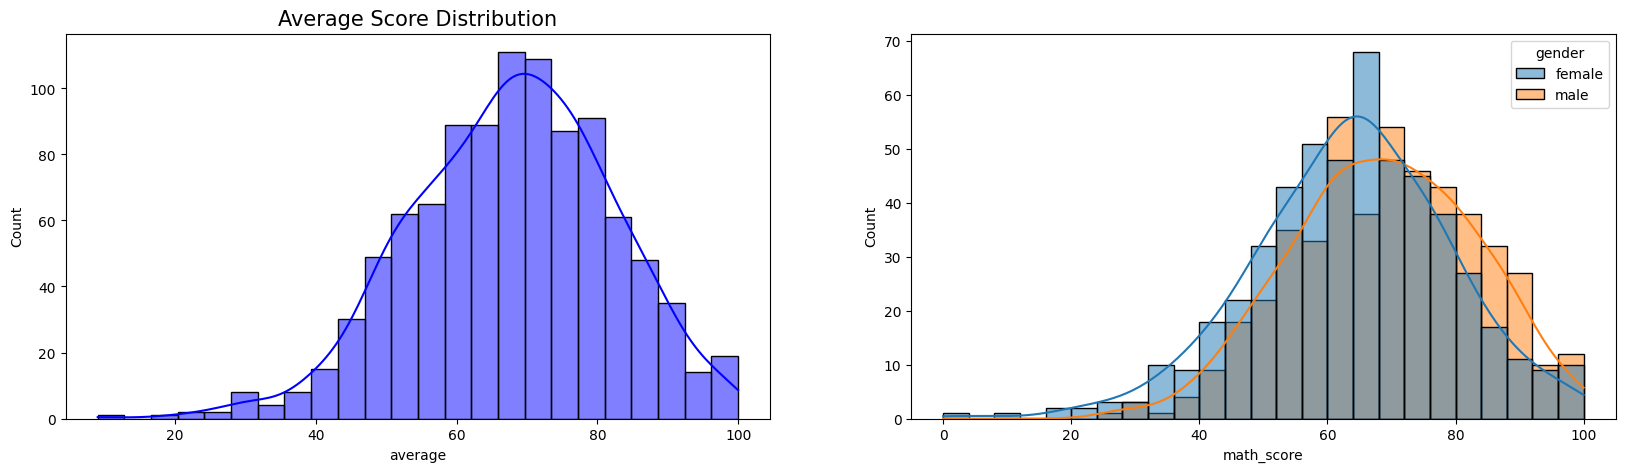

In [50]:
fig,axe=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', kde=True, ax=axe[0], color='blue')
plt.title('Average Score Distribution', fontsize=15)
plt.subplot(1,2,2)
sns.histplot(data=df, x='math_score', kde=True, hue='gender')
plt.show()

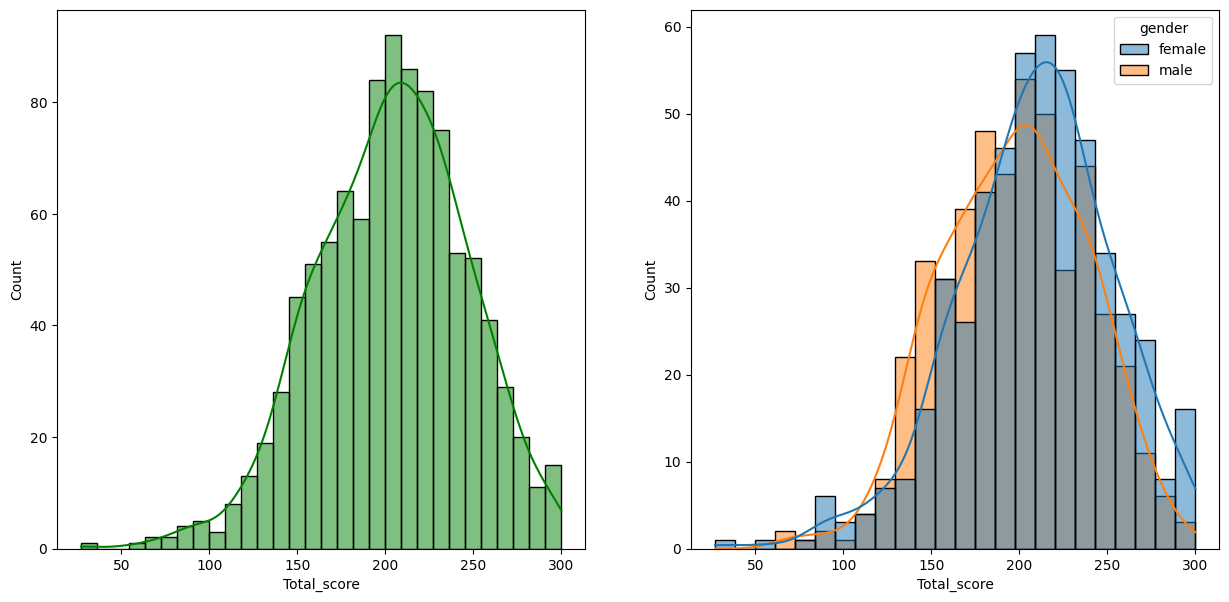

In [52]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

Insights: Female students tend to perform well then male students.

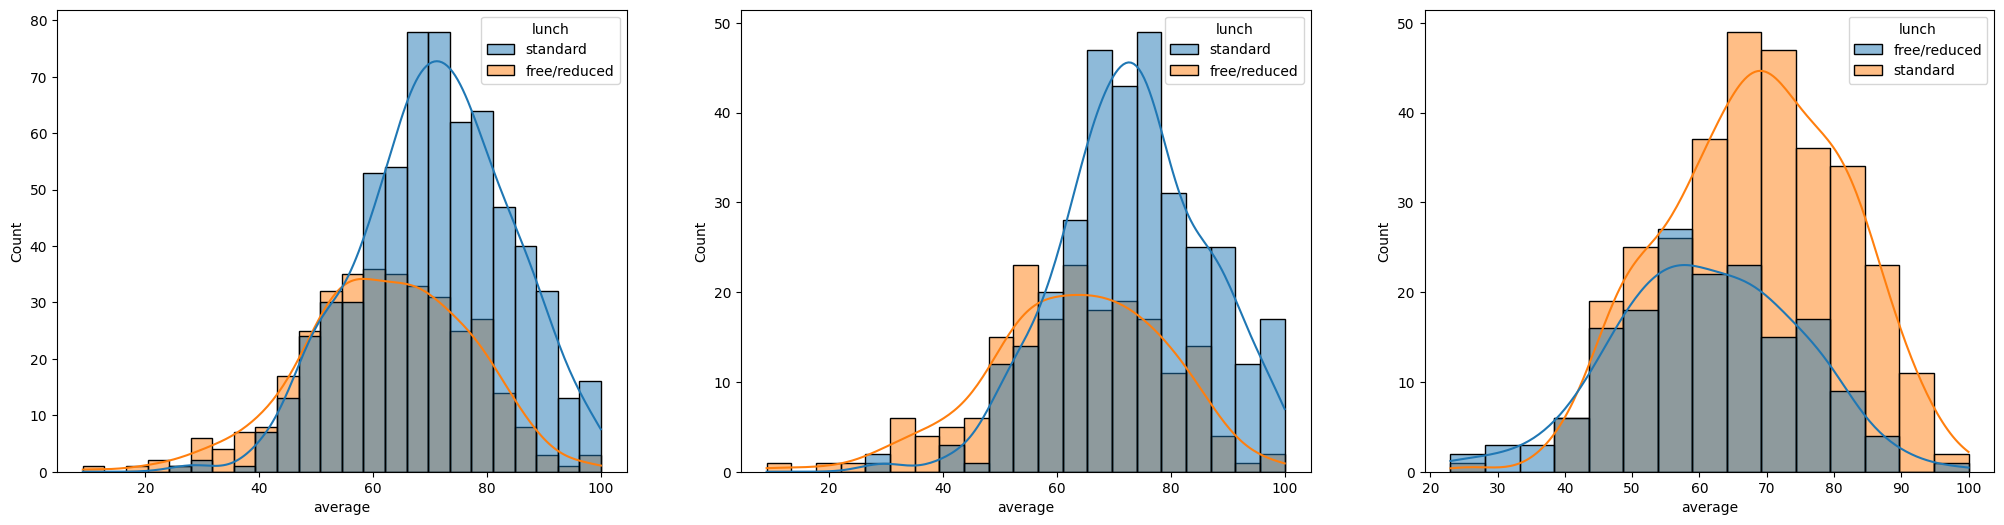

In [54]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

<Axes: title={'center': 'parental education affects female students'}, xlabel='average', ylabel='Count'>

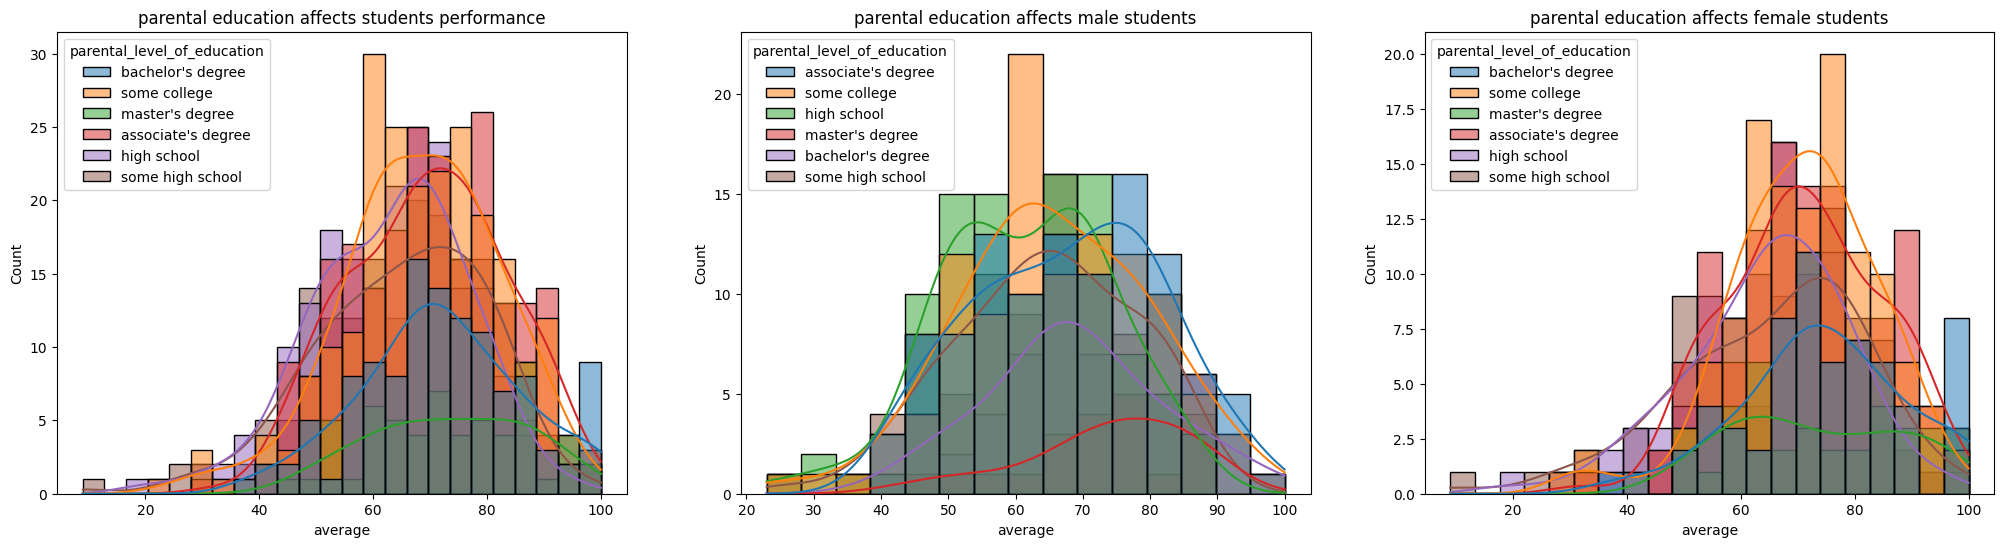

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
plt.title("parental education affects students performance")
sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='parental_level_of_education'
)
plt.subplot(1,3,2)
plt.title("parental education affects male students")
sns.histplot(
    data=df[df['gender']=='male'],
    x='average',
    kde=True,
    hue='parental_level_of_education'
)

plt.subplot(1,3,3)
plt.title("parental education affects female students")
sns.histplot(
    data=df[df['gender']=='female'],
    x='average',
    kde=True,
    hue='parental_level_of_education'
)



* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

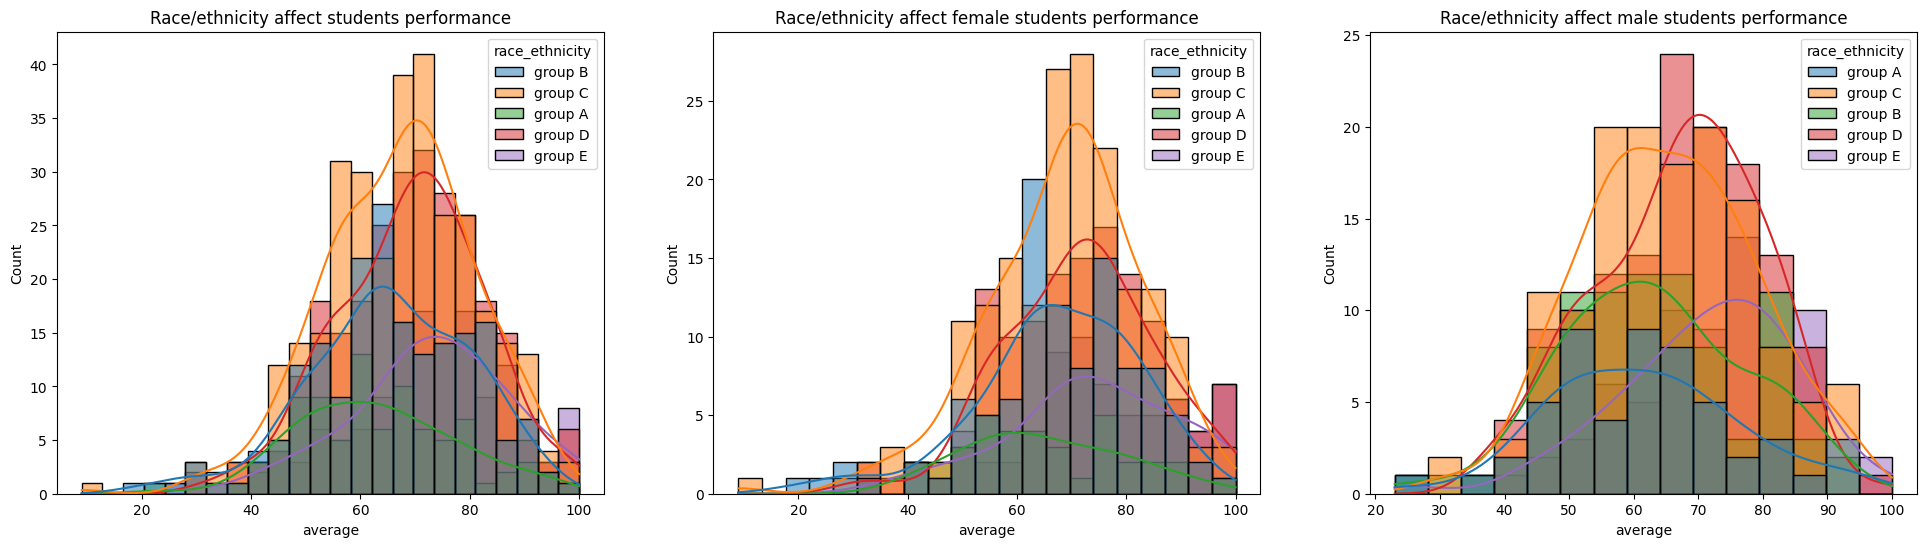

In [58]:
plt.subplots(1,3,figsize=(24,6))
plt.subplot(1,3,1)
plt.title("Race/ethnicity affect students performance")
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

plt.subplot(1,3,2)
plt.title("Race/ethnicity affect female students performance")
sns.histplot(data=df[df['gender']=='female'], x='average',kde=True, hue='race_ethnicity')
plt.subplot(1,3,3)
plt.title("Race/ethnicity affect male students performance")
sns.histplot(data=df[df['gender']=='male'], x='average',kde=True, hue='race_ethnicity')
plt.show()


Insights
+ Students of group A and group B tends to perform poorly in exam.
+ Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

##### 4.2 Maximumum score of students in all three subjects

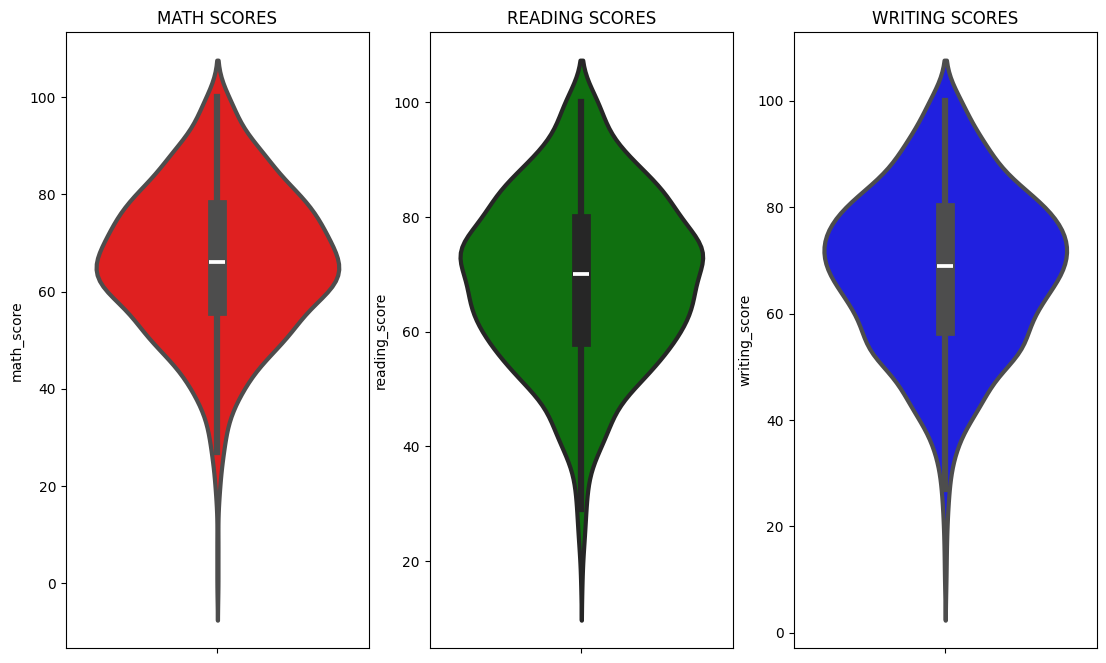

In [60]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
+ From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 4.3 Multi-variate analysis using pyplot

In [61]:
size=df['gender'].value_counts()
print(size)


gender
female    518
male      482
Name: count, dtype: int64


rcParams is a dictionary of configuration settings for Matplotlib plots.

“rc” stands for “runtime configuration”/global styling dictionary for matplotlib plots

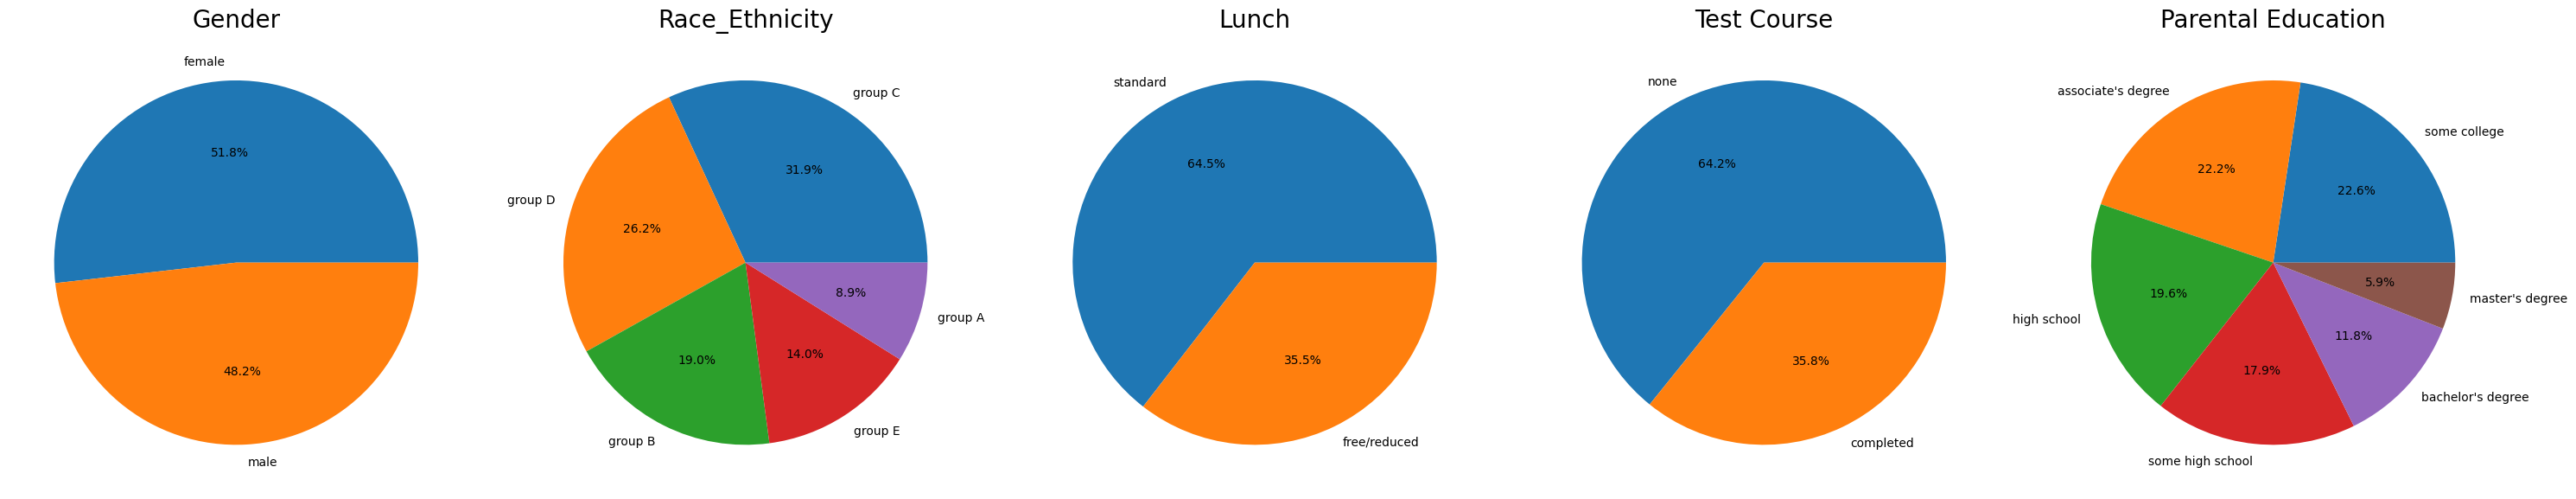

these are univariate analysis taking only the one column at a time 


In [63]:
plt.rcParams['figure.figsize'] = (30, 12)

# ---------- 1. Gender ----------
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
plt.pie(size, labels=size.index, autopct='%1.1f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# ---------- 2. Race/Ethnicity ----------
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
plt.pie(size.values, labels=size.index, autopct='%1.1f%%')
plt.title('Race_Ethnicity', fontsize=20)
plt.axis('off')

# ---------- 3. Lunch ----------
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
plt.pie(size, labels=size.index, autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# ---------- 4. Test Prep Course ----------
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
plt.pie(size.values, labels=size.index, autopct='%1.1f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# ---------- 5. Parental Education ----------
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
plt.pie(size, labels=size.index, autopct='%1.1f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

print("these are univariate analysis taking only the one column at a time ")


+ Number of Male and Female students is almost equal
+ Number students are greatest in Group C
+ Number of students who have standard lunch are greater
+ Number of students who have not enrolled in any test preparation course is greater
+ Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

##### 4.4 Feature wise visualization 


4.4.1 Gender Column
+ How is distribution of genders
+ Is gender has any impact on students performance?

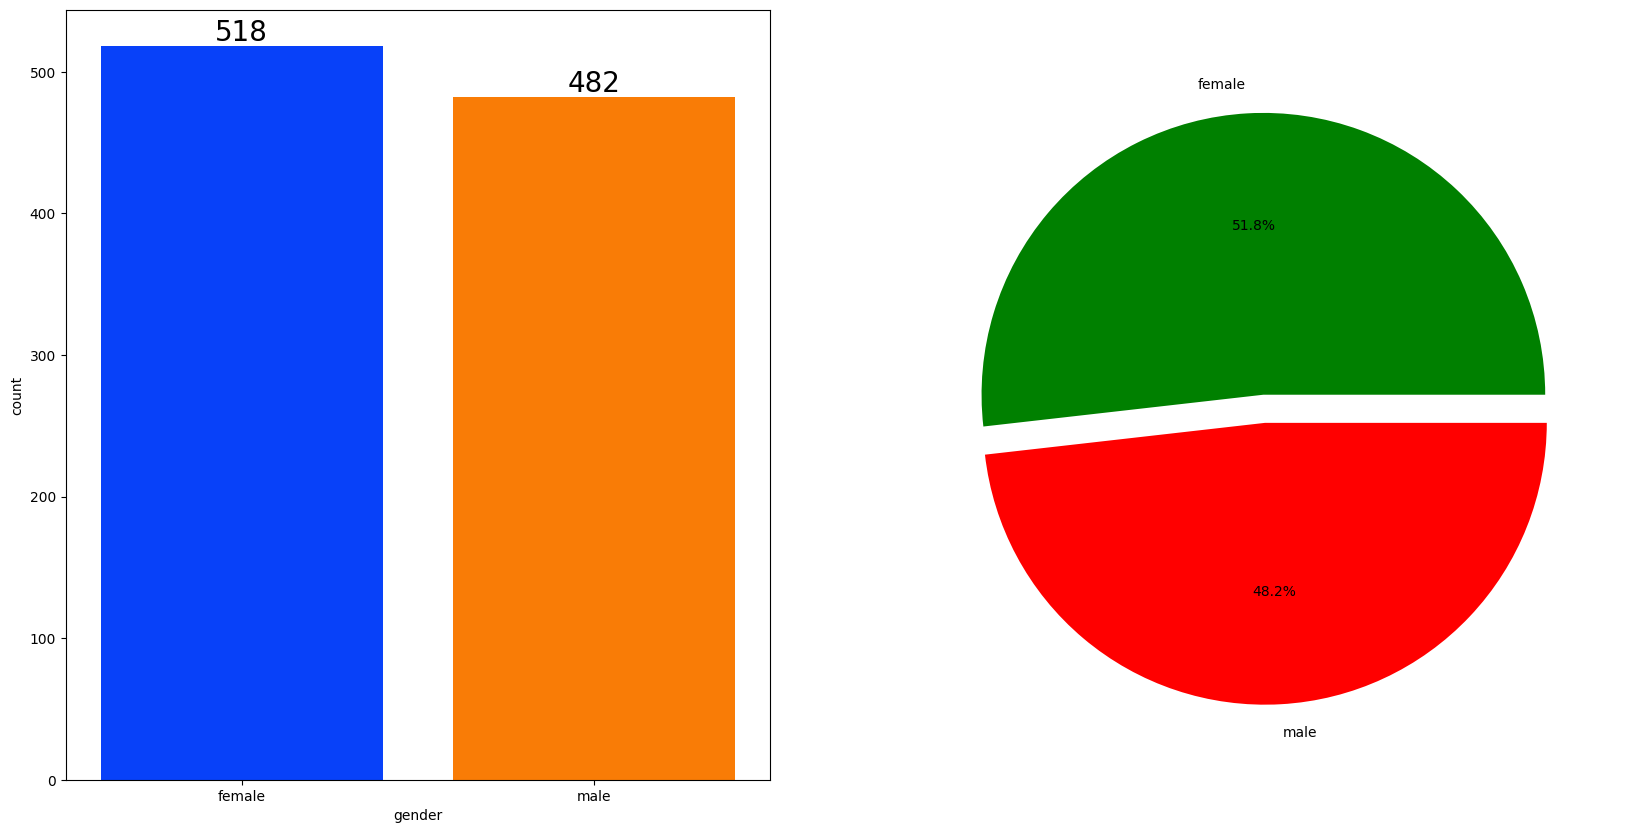

In [64]:
f,ax= plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index, explode=[0,0.1],autopct='%1.1f%%',colors=['green','red'])
plt.show()

Insights
Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [65]:
gender_group = df.groupby('gender')
gender_group['average'].mean()

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [66]:
gender_group['average'].count()
#sum()
# group of all rows where gender = "male"
# group of all rows where gender = "female"

gender
female    518
male      482
Name: average, dtype: int64

+ Do male and female students perform differently overall?
+ Is there a gender-based performance gap specifically in mathematics?
+ How does math performance compare to overall performance for each gender?


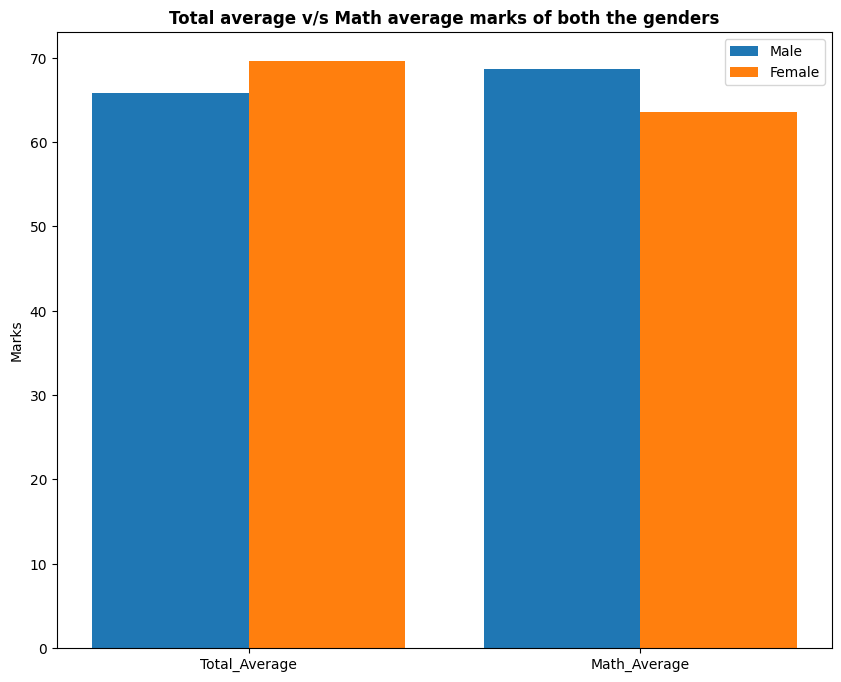

In [69]:
gender_stats = df.groupby('gender')[['average', 'math_score']].mean()

plt.figure(figsize=(10,8))

X = ['Total_Average', 'Math_Average']

female_scores = [
    gender_stats.loc['female', 'average'],
    gender_stats.loc['female', 'math_score']
]
male_scores = [
    gender_stats.loc['male', 'average'], 
    gender_stats.loc['male', 'math_score']
]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

+ On an average females have a better overall score than men.
+ whereas males have scored higher in Maths.

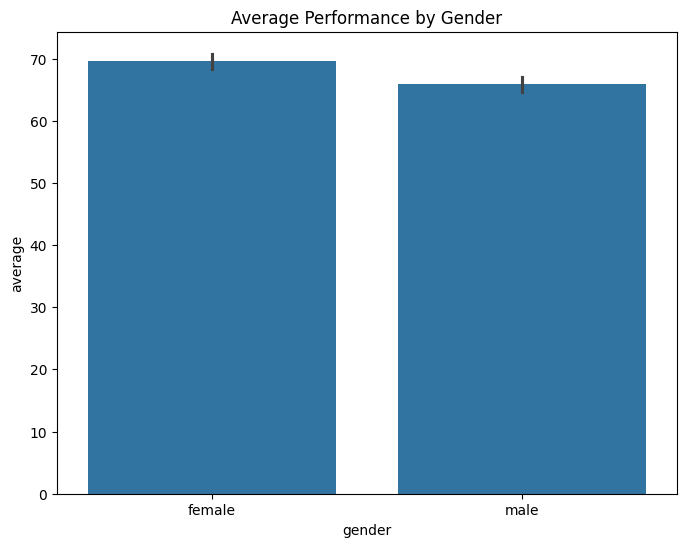

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gender', y='average')
plt.title("Average Performance by Gender")
plt.show()


Statistical Significance (t-test)

To check if gender difference is statistically meaningful, not random:

In [72]:
from scipy.stats import ttest_ind

male = df[df['gender']=='male']['average']
female = df[df['gender']=='female']['average']

t_stat, p_val = ttest_ind(male, female)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -4.169913529142
P-value: 3.311973638243664e-05


If p-value < 0.05, gender has a significant impact on student performance.

If p-value ≥ 0.05, gender does not significantly impact performance.

If p-value < 0.05, gender has a significant impact on student performance.

If p-value ≥ 0.05, gender does not significantly impact performance.

What is a p-value?

p-value is the probability that the difference you observe could happen by chance, assuming the null hypothesis is true.

Null hypothesis (H₀): "There is no difference between the groups."

Alternative hypothesis (H₁): "There is a difference between the groups."